<img src="https://raw.githubusercontent.com/EO-College/cubes-and-clouds/main/icons/cnc_3icons_process_circle.svg"
     alt="Cubes & Clouds logo"
     style="float: center; margin-right: 10px;" />

# 2.3 Data Access and Basic Processing

## Apply Operator

The apply operator employ a process on the datacube that calculates new pixel values for each pixel, based on n other pixels.

Let's start again with the same sample data from the Sentinel-2 STAC Collection, applying some fitlers to reduce the amount of data.

In [2]:
import openeo
from openeo.local import LocalConnection
local_conn = LocalConnection('')

url = "https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a"
spatial_extent = {"west": 11.1, "east": 11.5, "south": 46.1, "north": 46.5}

datacube = local_conn.load_stac(url=url,
                    spatial_extent=spatial_extent)

temporal_extent = ['2022-05-10T00:00:00','2022-05-12T00:00:00']
temporal_slice = datacube.filter_temporal(temporal_extent)

spatial_extent = {"west": 11.259613, "east": 11.406212, "south": 46.461019, "north": 46.522237}
spatial_slice = temporal_slice.filter_bbox(spatial_extent)
spatial_slice.execute()

C:\Users\mclaus\Documents\GitHub\openeo-python-client\openeo\metadata.py:255: UserWarning: No cube:dimensions metadata
  complain("No cube:dimensions metadata")
Deserialised process graph into nested structure


Walking node root-901e31cc-8152-4f46-a086-b0e0929bbabe
Walking node filtertemporal1-901e31cc-8152-4f46-a086-b0e0929bbabe
Walking node loadstac1-901e31cc-8152-4f46-a086-b0e0929bbabe


C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-c76406d59525aa50c789de0c5b437ffc' (time: 1,
                                                                band: 32,
                                                                y: 489, x: 1145)>
dask.array<getitem, shape=(1, 32, 489, 1145), dtype=float64, chunksize=(1, 1, 382, 860), chunktype=numpy.ndarray>
Coordinates: (12/53)
  * time                                     (time) datetime64[ns] 2022-05-11...
    id                                       (time) <U24 'S2A_32TPS_20220511_...
  * band                                     (band) <U12 'aot' ... 'wvp-jp2'
  * x                                        (x) float64 6.733e+05 ... 6.848e+05
  * y                                        (y) float64 5.153e+06 ... 5.148e+06
    eo:cloud_cover                           (time) object 13.994713
    ...                                       ...
    raster:bands                             (band) object [{'nodata': 0, 'da...
    gsd                                      (band) object None 10 ... None None
    common_name                              (band) object None 'blue' ... None
    center_wavelength                        (band) object None 0.49 ... None
    full_width_half_max                      (band) object None 0.098 ... None
    epsg                                     int32 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(600000.0, 5090220.0, 709800.0...
    crs:         epsg:32632
    transform:   | 10.00, 0.00, 600000.00|\n| 0.00,-10.00, 5200020.00|\n| 0.0...
    resolution:  10.0

Visualize the red band of our sample dataset:

Deserialised process graph into nested structure


Walking node root-ce7a7e54-7129-4bbe-9b89-b78c78c59dbf
Walking node filtertemporal1-ce7a7e54-7129-4bbe-9b89-b78c78c59dbf
Walking node loadstac1-ce7a7e54-7129-4bbe-9b89-b78c78c59dbf


C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


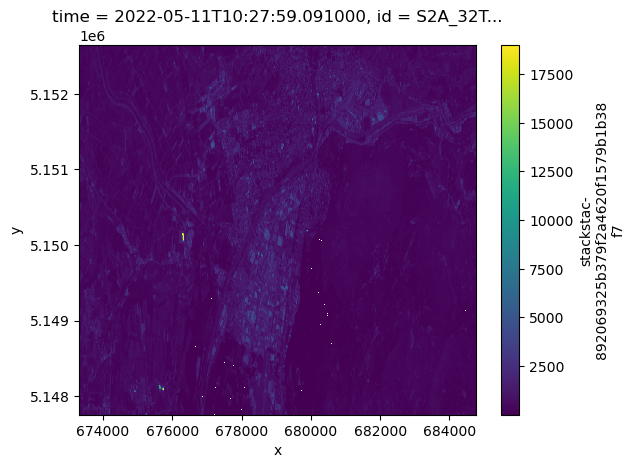

In [9]:
data = spatial_slice.execute()
data.loc[dict(band="red")][0].plot.imshow()

### Apply an arithmetic formula

We would like to improve the previous visualization, rescaling all the pixels between 0 and 1.

We can use `apply` in combination with other `math` processes.

In [20]:
from openeo.processes import clip
max_value = 2500
min_value = 0

def clipper(x):
    return clip(x,min_value,max_value)

clipped_data = spatial_slice.apply(clipper)
scaled_data = clipped_data / max_value
scaled_data

Visualize the result and see how `apply` scaled the data resulting in a more meaningful visualization:

Deserialised process graph into nested structure


Walking node root-99410bce-2c86-46ae-9bbf-e64823b20d9e
Walking node divide1-5c75bf5a-fa71-47a8-b520-d1121bdf2dc4
Walking node clip1-5c75bf5a-fa71-47a8-b520-d1121bdf2dc4
Walking node filterbbox1-99410bce-2c86-46ae-9bbf-e64823b20d9e
Walking node filtertemporal1-99410bce-2c86-46ae-9bbf-e64823b20d9e
Walking node loadstac1-99410bce-2c86-46ae-9bbf-e64823b20d9e


C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


DIVIDE


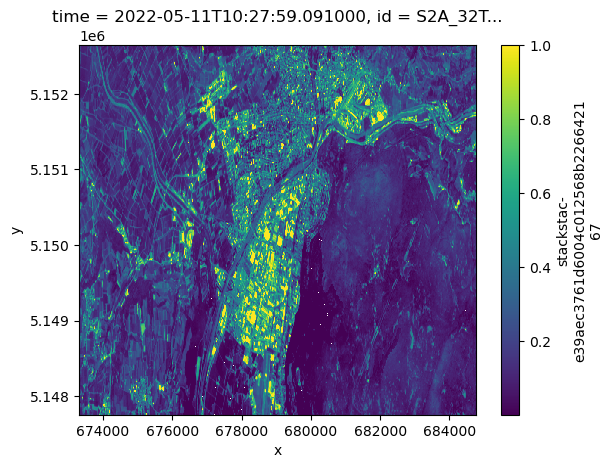

In [22]:
scaled_data_xr = scaled_data.execute()
scaled_data_xr.loc[dict(band="red")][0].plot.imshow()

After running the previous cell, it is visible that the result has less elements (or labels) in the temporal dimension `time`.

Additionally, the size of the selected data reduced a lot.